# Poison dart frogs

Can you estimate how toxic a poison dart frog is based on its brightness?

Poison dart frogs are small, colorful frogs from Central and South America. They're famous for their toxic skin, which some indigenous people use for blow darts.

Scientists studied the connection between the bright colors and toxicity of the poison dart frog **Dendrobates pumilio**. While they're usually red with blue legs, they can be found in about 15 different colors in Panama.

The file `frog-reflectance.csv` contains the average brightness (from 0 to 1) of 10 frog populations, measured on both the back and belly.

The file `frog-toxicity.csv` provides a `toxicity` score (from 0 to 1) for 48 frogs from the same 10 populations. Toxicity was tested by injecting frog skin extracts into mice and recording how long it took them to fall back asleep. Longer times suggest higher `toxicity`.

In [41]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'frog-reflectance.csv', 'frog-toxicity.csv', and 'linear_model.py'.

# from google.colab import files
# uploaded = files.upload()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from linear_model import LinearModel

df = pd.read_csv('frog-reflectance.csv')
df.head()

,pop_id,back_brightness,belly_brightness
0,AG,0.43,0.46
1,AL,0.64,0.42
2,BCG,1.00,0.95
3,BCO,0.82,1.00
4,CA,0.46,0.51


In [43]:
tox = pd.read_csv('frog-toxicity.csv')
tox.head()

,pop_id,frog_id,toxicity
0,BCO,BC167,0.886925
1,BCO,BC166,0.803917
2,BCO,BC171,0.625008
3,BCO,BC169,0.975847
4,BCO,BC165,0.774033


# Project Ideas

- Build two linear models:
	- Model 1: `toxicity` (x-axis) vs. `back_brightness`
	
	- Model 2: `toxicity` vs. `belly_brightness`

- To create the models, first calculate the average `toxicity` for each `pop_id`, then merge these values into the main dataframe (`df`).

- Visualize the data by creating scatter plots with best-fit lines for both models.

- Compare the goodness of fit between back and belly brightness and explore possible biological explanations for any differences in correlation.


In [44]:
# Average Toxicity pro pop_id
tox_mean = tox.groupby('pop_id', as_index=False)['toxicity'].mean()
df = df.merge(tox_mean, on='pop_id', how='left')
df.head()

,pop_id,back_brightness,belly_brightness,toxicity
0,AG,0.43,0.46,0.632902
1,AL,0.64,0.42,0.500877
2,BCG,1.00,0.95,0.885207
3,BCO,0.82,1.00,0.813146
4,CA,0.46,0.51,0.364581


In [ ]:
#Build two linear models:
#Model 1: `toxicity` (x-axis) vs. `back_brightness`
back_linear = LinearModel()
back_linear.fit(df['toxicity'],df['back_brightness'])
back_linear.print_model_info()

#Model 2: `toxicity` vs. `belly_brightness`
belly_linear = LinearModel()
belly_linear.fit(df['toxicity'],df['belly_brightness'])
belly_linear.print_model_info()


LinearModel():
Slope: 0.5758129980180036
Intercept: 0.3165043254009716
R-squared: 0.6067780219154056
LinearModel():
Slope: 0.34762229493312424
Intercept: 0.3936848861127157
R-squared: 0.18431612963411392


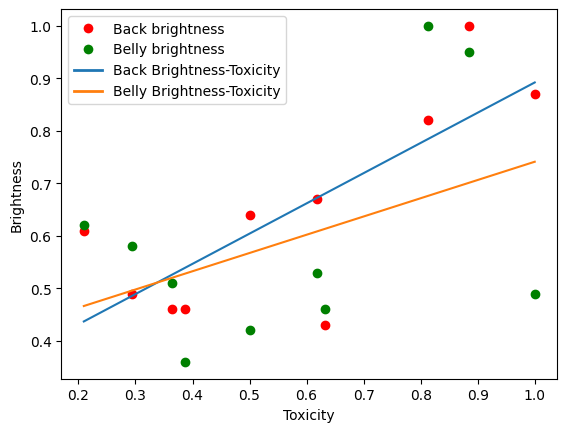

In [ ]:
# Visualize the data by creating scatter plots with best-fit lines for both models.
plt.scatter(df['toxicity'], df['back_brightness'], color='red', label='Back brightness')
plt.scatter(df['toxicity'], df['belly_brightness'], color='green', label='Belly brightness')
plt.xlabel('Toxicity')
plt.ylabel('Brightness')

# Plot best-fit lines 
back_linear.plot_model(df['toxicity'].min(), df['toxicity'].max(), color='C0')
belly_linear.plot_model(df['toxicity'].min(), df['toxicity'].max(), color='C1')

# Add a legend that includes both the scatter groups and the fitted lines
from matplotlib.lines import Line2D
legend_lines = [
	Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Back brightness'),
	Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Belly brightness'),
	Line2D([0], [0], color='C0', lw=2, label='Back Brightness-Toxicity'),
	Line2D([0], [0], color='C1', lw=2, label='Belly Brightness-Toxicity'),
]
plt.legend(handles=legend_lines)
plt.show()


The table above shows slope, intercept, R², p-value, and RMSE for both models.
If R² is significantly higher for the back model than for the belly model, this indicates that back brightness is a better predictor of toxicity.
Possible biological explanations:
- Visibility: The back is often the first thing predators see, so it may be more strongly associated with signaling (warning color).
- Functional differences: Belly colors may play a greater role in courtship or intraspecific communication and be less strongly associated with defense.
- Measurement error/variability: Different measurement methods or higher natural variability in a region can weaken the correlation.